# Approach

1. Introduction to the project
    -> Problem Statement
    -> How a model will help solve the problem
    -> What the model is trying to predict
    -> Why is it important to predict
2. All about the data
    1. Data gathering and overview (with library importation)
    2. Data quality observation and cleaning
    3. Feature Engineering (Main emphasis of the project and is carried out in multiple steps over the entire project)
    4. Data Visualization
        1. Feature distribution (Univariate Analysis)
            1. Categorical Features
            2. Numerical Features
        2. Empirical Relationship between features and the target (Bivariate Analysis)
            1. Categorical Features
            2. Numerical Features
        3. Correlation among the features
3. Modeling
    1. Data Sampling
    2. Decision Tree implementation with K-Fold Cross Validation
    3. Random Forest implementation with K-Fold Cross Validation
    4. XGBoost implementation with Hyperparameter Tuning using GridSearchCV and K-Fold Cross Validation
    5. Comparative model performance evaluation and finalization
    6. Feature importance test with finalized model
    7. Target prediction
    8. Model performance evaluation by visualizing the ROC Curve
5. Conclusion

# 1. Introduction to the project

Banks run on sales. Selling services to clients help them earn money. They charge clients fees for the services provided and investing clients’ deposits to generate additional funds. A Term Deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. These deposits give banks greater investing power so banks can invest/lend more and make profits. But banks cannot expect to sit back and let clients walk in. To sell their products, in this case, Term Deposits, they must reach out to clients and educate them about the benefits of subscribing to it. This is vital for maximum productivity and the development of their business. But calling anyone and everyone is not a viable option as it requires manpower to reach out to clients, follow up with them and resolve their queries, and hence is expensive. That makes it important to have a great conversion ratio, i.e. how many clients subscribe over the total calls made. 

It would be best if they can predict beforehand if the client is going to subscribe to a Term Deposit. 

This would be a perfect use case for a predictive model, as it would help to narrow down the options of clients to approach to maximize our conversion ratio, in the future. For new clients, the Marketing team can just input the variables into the model and it would give them a prediction on if there is a chance the client would subscribe to a Term Deposit.

# 2. All about the data

Data relevant to this problem is the characteristics of the previous clients. Banks own and maintain this data while ensuring outsiders are unable to access any of it to stay ahead in the game. But we have a sample dataset to work with.

We are observing a department that handles marketing, specifically for acquiring clients to subscribe to a term deposit. The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, to access if a bank Term Deposit would be or not subscribed. Each row represents records on characteristics of a previous client and if they subscribed to a Term Deposit. The classification goal is to predict if the client will subscribe to a Term Deposit.

Source of the data: https://archive.ics.uci.edu/ml/datasets/bank+marketing

# 2.A Data gathering and overview (with library importation)

Library Importation

In [48]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sorted_months_weekdays import Month_Sorted_Month, Weekday_Sorted_Week
from collections import Counter as counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
random = 33

In [50]:
df = pd.read_csv("bank.csv")

In [51]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,mon,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,mon,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,mon,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,mon,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,mon,may,198,1,-1,0,unknown,no


We have 16 features which will help us predict the target (17th) variable.
Taking a look at our features. The features can be classified into client's personal information and features associated with information on previous contacts with the client.

Clients' personal information:
1. Age: Age of the client (in Years)
2. Job: Job type of the client
3. Marital: Marital status of the client
4. Education: Education level of the client
5. Default: If the client has defaulted in the past
6. Balance: Client's average yearly bank balance
7. Housing: If the client has a housing loan
8. Loan: If the client has a personal loan

Features associated with information on previous contacts with the client:
9. Contact: Type of communication previously made with the client
10. Day of week: Day of the week of the previous contact made with the client
11. Month: Month of the year of the previous contact made with the client
12. Duration: Duration of the previous phone call made with the client (in Seconds)
13. Campaign: Number of contacts performed to a client in this and previous campaign combined
14. Pdays: Number of days passed since last contact made to client
15. Previous: Number of contacts performed to a client in the previous campaign
16. Poutcome: Outcome of the previous campaign for this client

Target
17. Y: Did the client subscribe to a term deposit?

Since most features are categorical and the target variable is also binary, we will be using classification models to make our predictions.

# 2.B Data quality observation and cleaning

Renaming some features for better understanding of their significance.

In [5]:
df.rename(columns={"contact": "prev_communication_type"},inplace=True)
df.rename(columns={"day_of_week": "prev_contact_day_of_week"},inplace=True)
df.rename(columns={"month": "prev_contact_month_of_year"},inplace=True)
df.rename(columns={"duration": "prev_contact_duration"},inplace=True)
df.rename(columns={"campaign": "num_contacts"},inplace=True)
df.rename(columns={"pdays": "days_since_prev_contact"},inplace=True)
df.rename(columns={"previous": "prev_camp_num_contacts"},inplace=True)
df.rename(columns={"poutcome": "prev_camp_outcome"},inplace=True)
df.rename(columns={"y": "term_deposit_subscribed"},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         41188 non-null  int64 
 1   job                         41188 non-null  object
 2   marital                     41188 non-null  object
 3   education                   41188 non-null  object
 4   default                     41188 non-null  object
 5   balance                     41188 non-null  int64 
 6   housing                     41188 non-null  object
 7   loan                        41188 non-null  object
 8   prev_communication_type     41188 non-null  object
 9   prev_contact_day_of_week    41188 non-null  object
 10  prev_contact_month_of_year  41188 non-null  object
 11  prev_contact_duration       41188 non-null  int64 
 12  num_contacts                41188 non-null  int64 
 13  days_since_prev_contact     41188 non-null  in

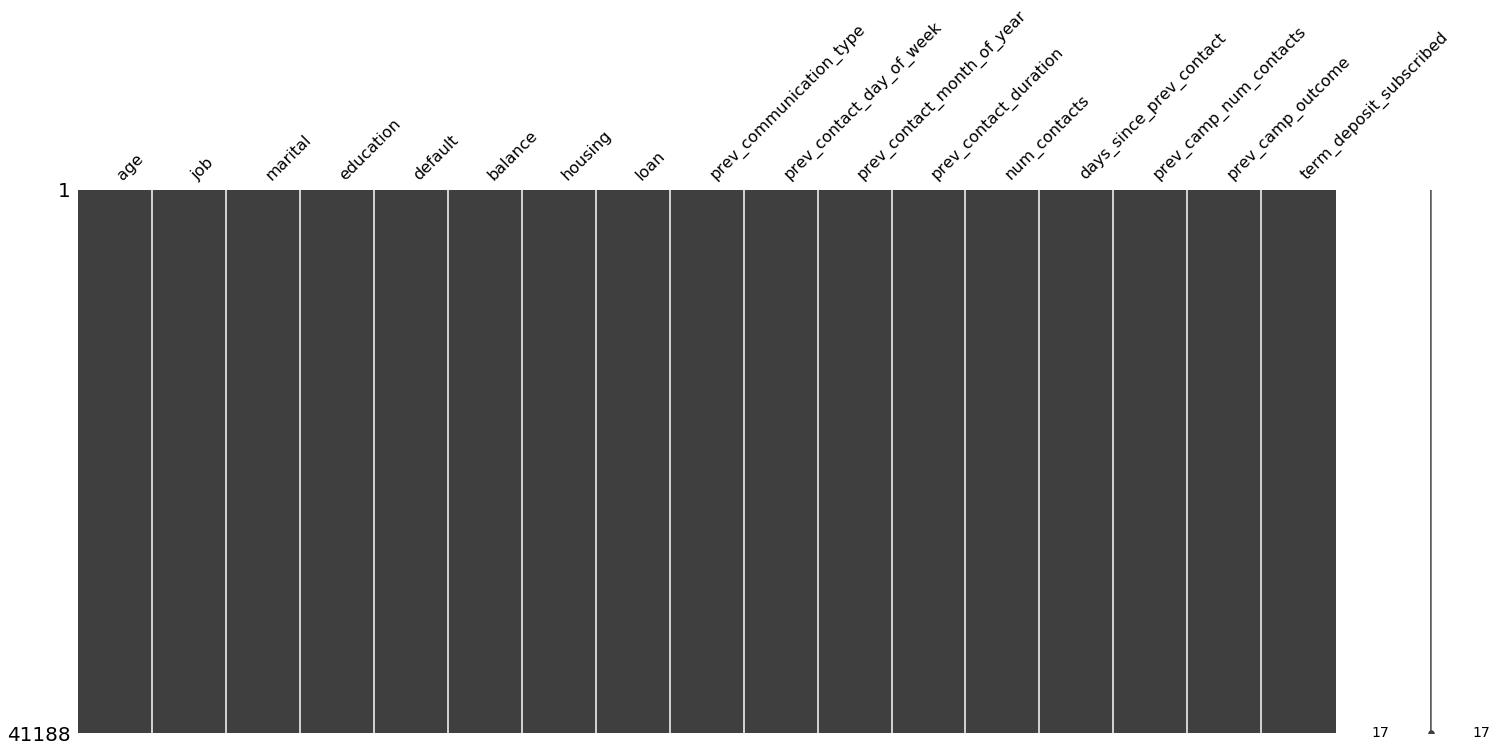

In [6]:
df.info()
msno.matrix(df)

The records and plot shows that we don't have any missing values in this dataset.

Removing if there are duplicate entires in the dataset.

In [7]:
df.drop_duplicates(inplace=True)

# 2.C Feature Engineering

Feature Engineering is carried out at multiple steps in this project.

The feature "prev_camp_num_contacts" counts the number of contacts made to a client in the previous campaign.
The feature "num_contacts" counts the total number of contacts made to a client, including in the previous campaign. This makes the feature "prev_camp_num_contacts" redundant. Hence it can be removed from the dataset.

In [8]:
df.drop("prev_camp_num_contacts",1,inplace=True)

Observing the feature "days_since_prev_contact"

Min: -1 Max: -1.0
Ratio of clients not contacted previously: 0.8154316791298436


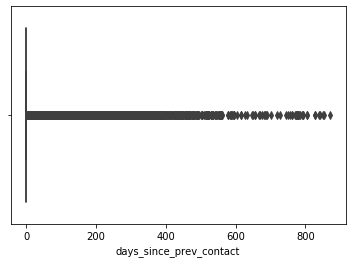

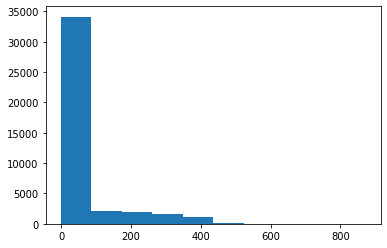

In [9]:
Q1 = df.days_since_prev_contact.quantile(0.25)
Q3 = df.days_since_prev_contact.quantile(0.75)
IQR = Q3 - Q1
print("Min:",min(df.days_since_prev_contact),"Max:",Q3 + 1.5* IQR)
print("Ratio of clients not contacted previously:",counter(df.days_since_prev_contact)[-1]/len(df.days_since_prev_contact))
sns.boxplot(df.days_since_prev_contact)
plt.show()
plt.hist(df.days_since_prev_contact)
plt.show()

Here, "-1" is indicative of no previous contacts made to a client.
This feature tells us that over 80% of clients in this campaign were not contacted before.
So we can ignore how many days have passed since previous contact to the client and focus on if the client has been contacted before or not.
Converting -1 to 0 (no previous contact) and values > 0 to 1 (previously contacted).

In [10]:
df.days_since_prev_contact = ["no" if df.days_since_prev_contact[i] == -1 else "yes" for i in range(len(df.days_since_prev_contact))]
df.rename(columns={"days_since_prev_contact": "previously_contacted"},inplace=True)

(array([33586.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7602.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

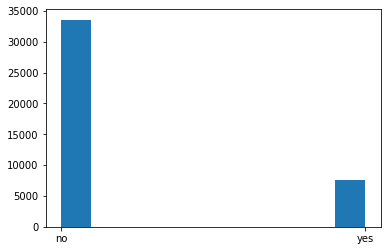

In [11]:
plt.hist(df.previously_contacted)

Now, the feature "days_since_prev_contact" is binary, indicating if the client has been contacted previously or not.

# 2.D Data Visualization

# 2.D.a Feature Distibution (Univariate Analysis)

# 2.D.a.i Categorical Features

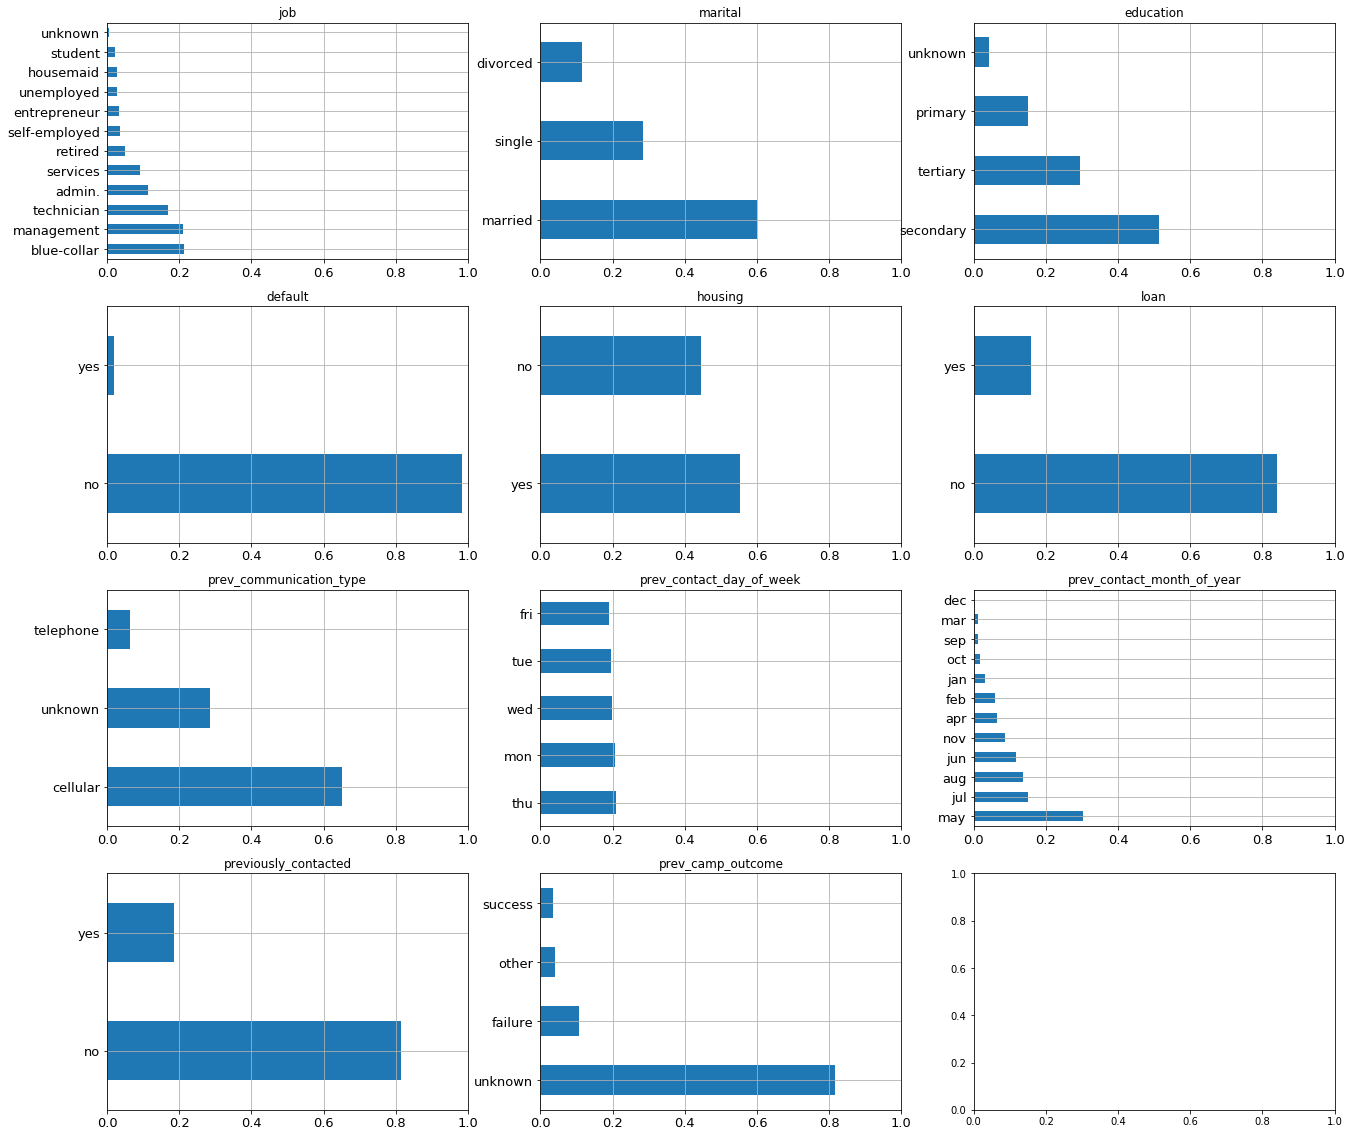

In [12]:
fig, axes = plt.subplots(4, 3, figsize=(22,20))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate([df.columns[i] for i in range(0, len(df.columns)-1) if df.iloc[:,i].dtype=="O"]):
    (df[c].value_counts()/df[c].value_counts().sum()).plot(kind='barh',ax=axes[i],title=c,fontsize=13,grid = True,xlim = (0,1))

Some features show high imbalance, like "prev_contact_month_of_year" indicates that a much greater number of clients were contacted in the summer, especially May, as against the winter months. 

Another feature that shows imbalance is "previously_contacted", which indicated banks are searching for newer clients to make deposits as compared to reaching out to their older customers.

Feature marital indicates that banks are more inclined in offering their services to married individuals as opposed to single or divorced.

The biggest imbalance is seen in the featue "deafult". The reason seems unknown to me as to why banks wouldn't prefer individuals who have defaulted in the past as they are not lending them anything.

On the other hand, featues like "prev_contact_day_of_week" is quite evenly distributed.

The feature "housing" shows that banks are about evenly offering term deposits to house mortgage owners vs non owners.

# 2.D.a.ii Numerical Features

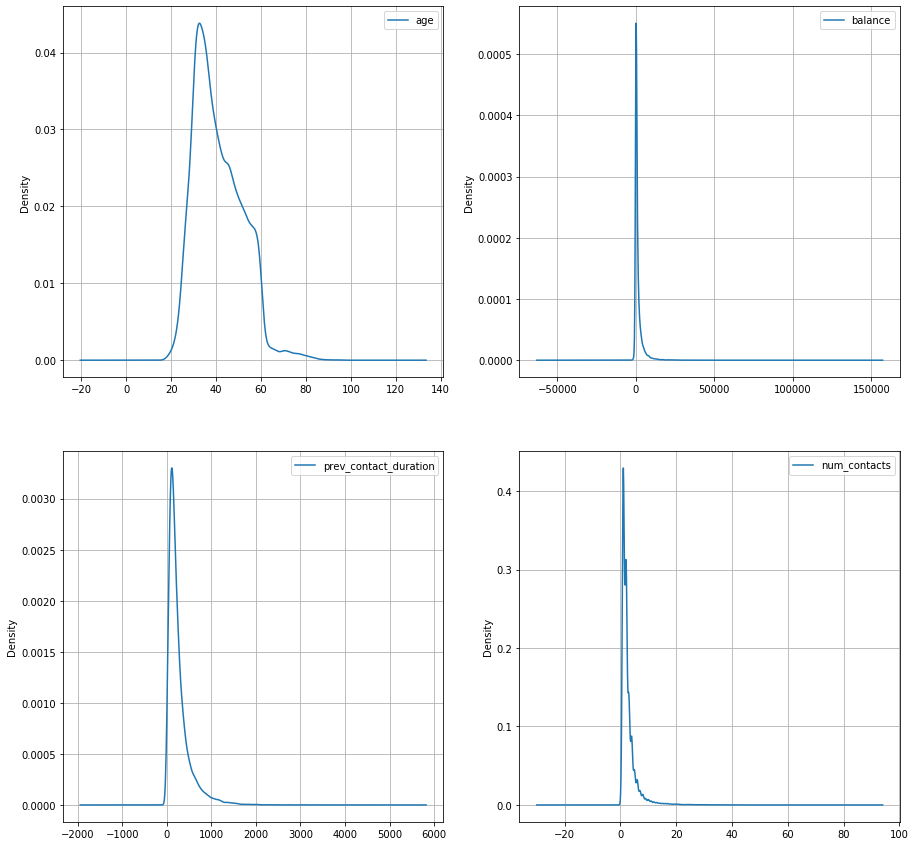

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate([df.columns[i] for i in range(0, df.shape[1]) if df.iloc[:,i].dtype=="int64"]):
    plot = df[[c]].plot(kind="kde", ax=axes[i],grid = True)

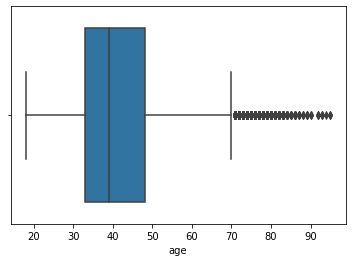

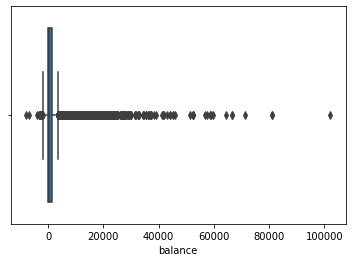

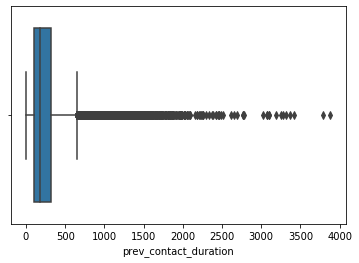

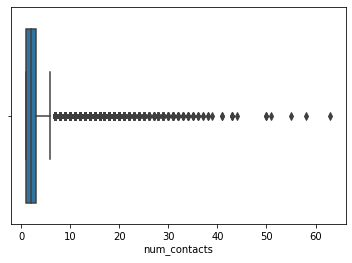

In [14]:
for each in [df.columns[i] for i in range(0, df.shape[1]) if df.iloc[:,i].dtype=="int64"]:
    sns.boxplot(df[each])
    plt.show()

The features "balance","prev_contact_duration","num_contacts" are not normally distributed, i.e. they show skewness towards the right side.

This would have imposed a problem on regression models unless applied a power transformation on, but since we are working with classification models it should be harmless in this case.

Classification models are immune to outliers.

However, we will check for a poor accuracy score and fix these features as a part of Feature Engineering as well if needed.

An alternative to power transformation would have been Binning, but binning could go against the accuracy in some cases if the bins are not made adequately.

# 2.D.b Empirical Relationship between features and the target (Bivariate Analysis)

# 2.D.b.i Categorical Features

In [15]:
def visualize_cat(name):    
    data = pd.DataFrame({name:df[name],"yes": df['term_deposit_subscribed'].replace(["yes","no"],[1,0]),"no": df['term_deposit_subscribed'].replace(["yes","no"],[0,1]),})

    if (name == "prev_contact_month_of_year"):
        y_pcent = [(round(((data.groupby(name).sum()).yes)[i]/(((data.groupby(name).sum()).yes)[i]+((data.groupby(name).sum()).no)[i]),2))*100 for i in Month_Sorted_Month(data[name].unique())]
        n_pcent = [(round((100 - y_pcent[i]),2)) for i in range(len(data[name].unique()))]
        groups = Month_Sorted_Month(df[name].unique())
    elif (name == "prev_contact_day_of_week"):
        y_pcent = [(round(((data.groupby(name).sum()).yes)[i]/(((data.groupby(name).sum()).yes)[i]+((data.groupby(name).sum()).no)[i]),2))*100 for i in Weekday_Sorted_Week(data[name].unique())]
        n_pcent = [(round((100 - y_pcent[i]),2)) for i in range(len(data[name].unique()))]
        groups = Weekday_Sorted_Week(df[name].unique())
    else:
        y_pcent = [(round(((data.groupby(name).sum()).yes)[i]/(((data.groupby(name).sum()).yes)[i]+((data.groupby(name).sum()).no)[i]),2))*100 for i in np.sort(data[name].unique())]
        n_pcent = [(round((100 - y_pcent[i]),2)) for i in range(len(data[name].unique()))]
        groups = np.sort(df[name].unique())

    newdf = pd.DataFrame({name: groups, "Term Deposit Subscribed": y_pcent,"Term Deposit Not Subscribed": n_pcent})

    ax = newdf.plot(x = name, kind = "barh", stacked = True, width = 0.9, color = ("green","red"),fontsize = 15)
    ax.set_title(name.upper(),fontsize = 15,y = 1.15)
    ax2 = ax.twiny()
    ax2.set_xticks((list(range(0,101,20))))
    ax2.set_xticklabels(np.flip(list(range(0,101,20))))
    ax.margins(0)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=2)
    ax.set_ylabel("")
    ax.set_xlabel("Term Deposit Subscribed (in %)")
    ax2.set_xlabel("Term Deposit Not Subscribed (in %)")

    if ((newdf['Term Deposit Subscribed']< 7).any() == True or (newdf['Term Deposit Not Subscribed']< 7).any() == True):
        rot = 90
    else:
        rot = 0

    for i in range(len(newdf[name])):
        plt.text(100- newdf["Term Deposit Not Subscribed"][i]/2, i,  # X , Y
                 str(round(newdf["Term Deposit Not Subscribed"][i],1))+"%", # S
                 va = "center",ha = "center",rotation = rot)
        plt.text(newdf["Term Deposit Subscribed"][i]/2, i, 
                 str(round(newdf["Term Deposit Subscribed"][i],1))+"%",
                 va = "center",ha = "center",rotation = rot)

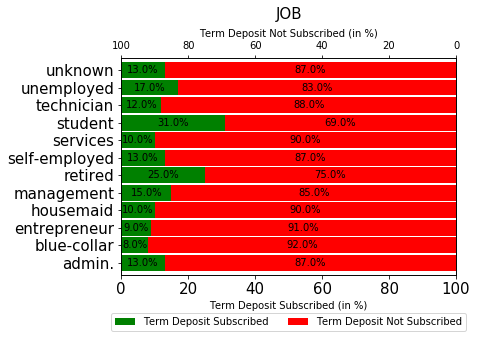

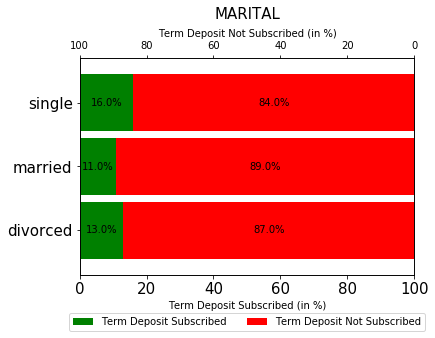

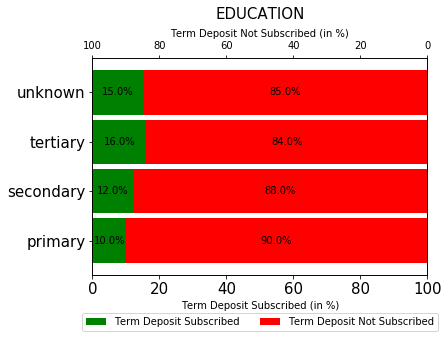

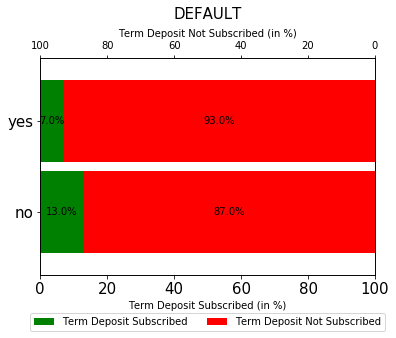

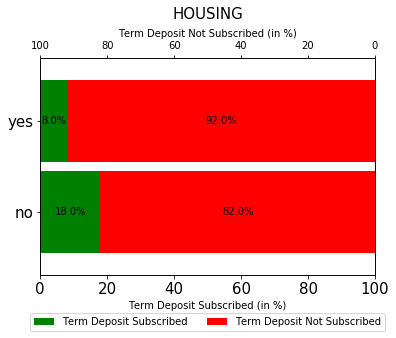

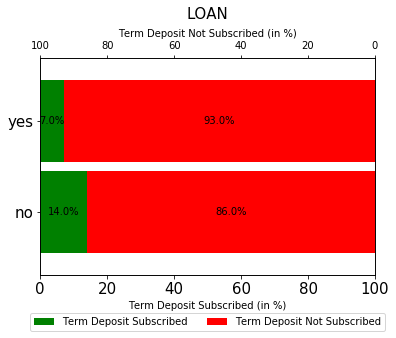

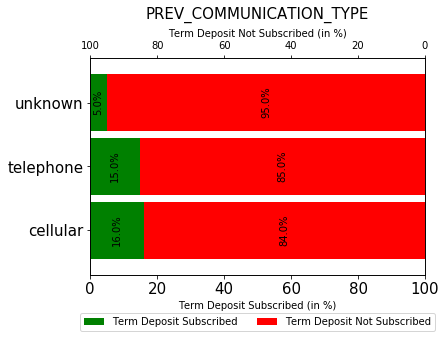

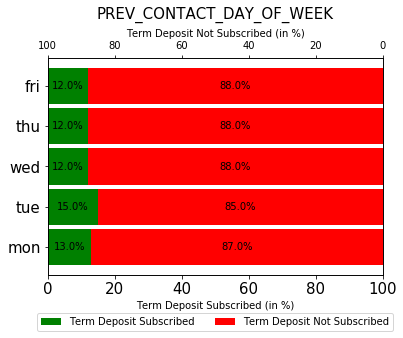

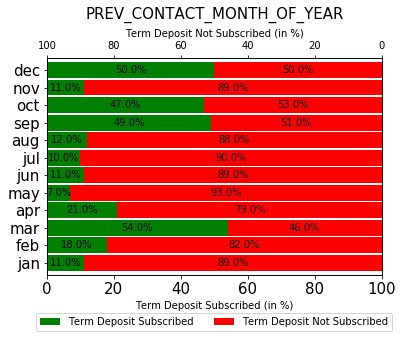

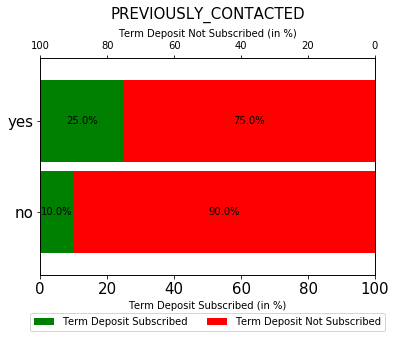

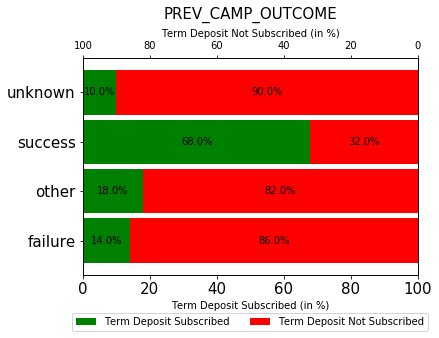

In [16]:
for each in [df.columns[i] for i in range(0, len(df.columns)-1) if df.iloc[:,i].dtype=="O"]:
    visualize_cat(each)

Observing the response in the target variable job type as a feature, we see that students and retired people are the biggest subscribers of term deposits. This may be since they don't have a steady source of income and the coupons received from these deposits could help them financially.

"previously_contacted" clients show a much greater chance of subscribing to a term deposit compared to new clients. 
This is complemented by the feature "prev_camp_outcome" which says if a client has subscribed to a term deposit in the previous campaign, they will do in the next one as well.

# 2.D.b.ii Numerical Features

In [17]:
def visualize_num(name,intervals):
    
    intervals.insert(0,np.min(df[name]))
    intervals.append(np.max(df[name]))
    
    data = pd.DataFrame({"yes": df['term_deposit_subscribed'].replace(["yes","no"],[1,0]),
                         "no": df['term_deposit_subscribed'].replace(["yes","no"],[0,1]),
                         name:df[name]})
    
    yss = [int((((((data.loc[((data[name] > intervals[i]) & (data[name] < intervals[i+1]))])).groupby(name).sum()).sum()['yes']/((((data.loc[((data[name] > intervals[i]) & (data[name] < intervals[i+1]))])).groupby(name).sum()).sum()['yes']+(((data.loc[((data[name] > intervals[i]) & (data[name] < intervals[i+1]))])).groupby(name).sum()).sum()['no'])))*100) for i in range(len(intervals)-1)]
    nno = [int((((((data.loc[((data[name] > intervals[i]) & (data[name] < intervals[i+1]))])).groupby(name).sum()).sum()['no']/((((data.loc[((data[name] > intervals[i]) & (data[name] < intervals[i+1]))])).groupby(name).sum()).sum()['yes']+(((data.loc[((data[name] > intervals[i]) & (data[name] < intervals[i+1]))])).groupby(name).sum()).sum()['no'])))*100) for i in range(len(intervals)-1)]
    bins = [str(intervals[i])+' < '+name+' < '+str(intervals[i+1]) for i in range(len(intervals)-1)]
    
    newdf = pd.DataFrame({name: bins, "Term Deposit Subscribed": yss,"Term Deposit Not Subscribed": nno})


    plt.figure(figsize=(16,16))
    ax = newdf.plot(x = name, kind = "barh", stacked = True, width = 0.9, color = ("green","red"),fontsize = 15)
    ax.set_title(name.upper(),fontsize = 15,y = 1.15)
    ax2 = ax.twiny()
    ax2.set_xticks((list(range(0,101,20))))
    ax2.set_xticklabels(np.flip(list(range(0,101,20))))
    ax.margins(0)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=2)
    ax.set_ylabel("")
    ax.set_xlabel("Term Deposit Subscribed (in %)")
    ax2.set_xlabel("Term Deposit Not Subscribed (in %)")
    
    for i in range(len(newdf[name])):
        plt.text(100- newdf["Term Deposit Not Subscribed"][i]/2, i,  # X , Y
                 str(round(newdf["Term Deposit Not Subscribed"][i],1))+"%", # S
                 va = "center",ha = "center")
        plt.text(newdf["Term Deposit Subscribed"][i]/2, i, 
                 str(round(newdf["Term Deposit Subscribed"][i],1))+"%",
                 va = "center",ha = "center")

<Figure size 1152x1152 with 0 Axes>

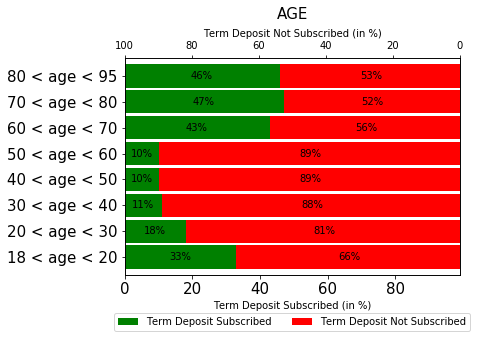

<Figure size 1152x1152 with 0 Axes>

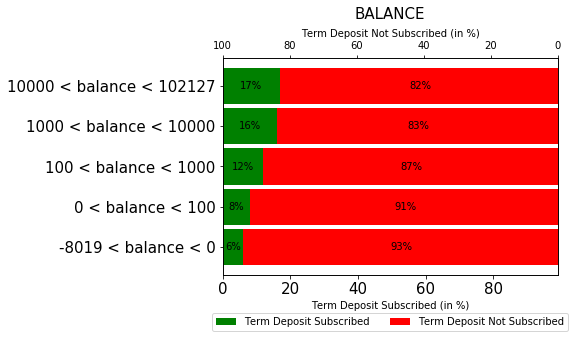

<Figure size 1152x1152 with 0 Axes>

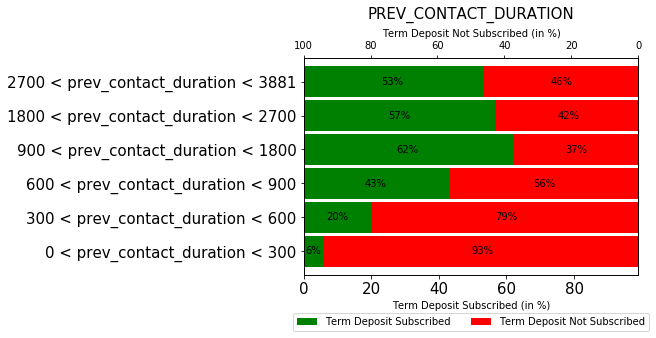

<Figure size 1152x1152 with 0 Axes>

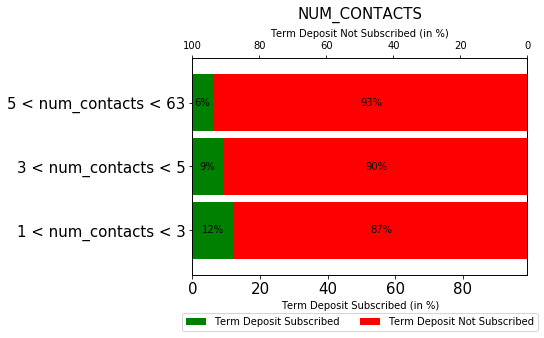

In [18]:
visualize_num('age',[20,30,40,50,60,70,80])
visualize_num('balance',[0,100,1000,10000])
visualize_num('prev_contact_duration',[5*60,10*60,15*60,30*60,45*60])
visualize_num('num_contacts',[3,5])

The lower and higher "age" group subscribing to term deposits better explain the response in target with job type. Individuals over 60 are generally retired and hence see a drastic jump in positive responses, so do the age group under 20.

"balance" seems to be directly related to the response in term deposits. This might indicate that the greater a client's bank balance, the more disposable cash they might have to invest.

"prev_contact_duration" tells us that spending between 900 - 1800 seconds (15 - 30 minutes) is the sweet spot in terms of getting a client to subscribe to term deposits.

# 2.D.c Correlation among the features

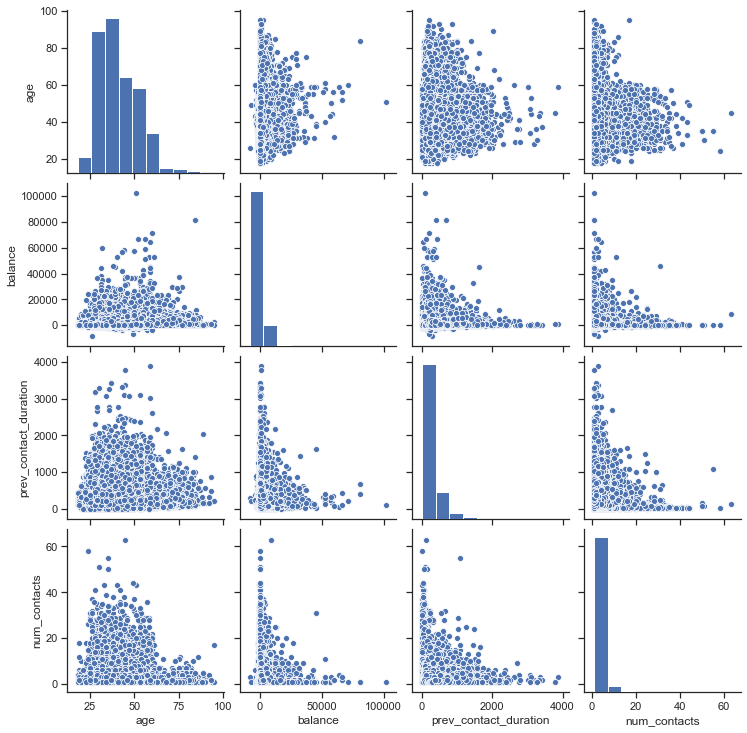

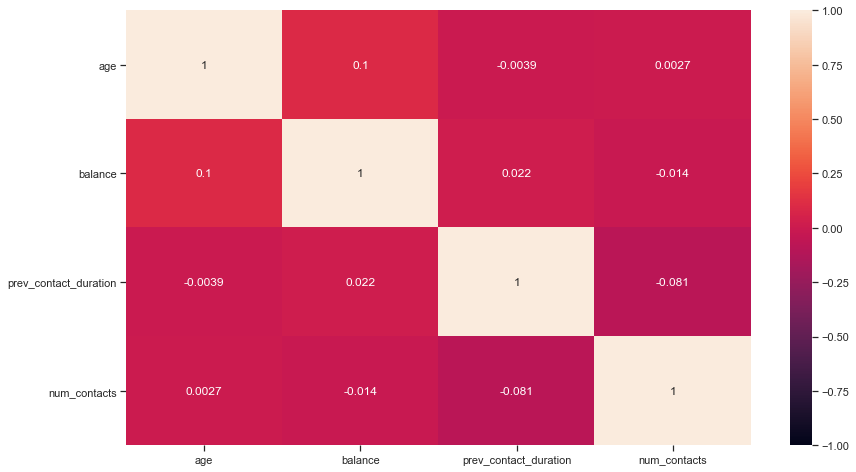

In [19]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(df)
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, vmin = -1,vmax = 1)

The correlation plots indicate there is some relation between features but nothing strong enough to stand out.

# 3. Modeling

# Feature engineering Pt. 2

It is important to encode data as even though tree models work on distribution of classes, they only accept numerical values as opposed to strings.

Carrying out encoding for binary features like the "target", "previously_contacted".

Although the sequence of encoding is not important, ordered features are coded sequentially for better understanding

Encoding all other categorical variables into numericals.

In [20]:
#replacing yes and no in target by 1 and 0
df.term_deposit_subscribed = df.term_deposit_subscribed.replace(['yes','no'],[int(1),int(0)])

#Previously contacted yes = 1 no = 0
df.previously_contacted = [0 if df.previously_contacted[i] == "no" else 1 for i in range(len(df.previously_contacted))]

#day of week
df['prev_contact_day_of_week'].replace(Weekday_Sorted_Week((df.prev_contact_day_of_week).unique()),list(range(1,len((df.prev_contact_day_of_week).unique())+1)),inplace=True)

#month of year
df['prev_contact_month_of_year'].replace(Month_Sorted_Month((df.prev_contact_month_of_year).unique()),list(range(1,len((df.prev_contact_month_of_year).unique())+1)),inplace=True)

#numbers for categorical variables
#No = 0 Yes = 1
for each in [df.columns[i] for i in range(0, df.shape[1]) if df.iloc[:,i].dtype=='O']:
    a = df[each].unique()
    b = range(0,len(a))
    df[each] = df[each].replace(a,b)

# 3.A Data Sampling

The dataset is split into 70% train and 30% test since we have over 40,000 rows of data.

This split was chosen as it gives us a greater number of outcomes to predict, hence ensuring the durability of the model.

K is the value for cross validation we want to carry out to find out the mean performance of the models.

It is chosen as 10 in this case as a tradeoff between masking poor performance by the models and computing power.

In [21]:
y = df["term_deposit_subscribed"]
X = df.loc[:, df.columns != 'term_deposit_subscribed']

size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= size,random_state = random)

k = 10

Creating arrays to store accuracy scores of each model

In [22]:
names = []
accuracy = []

# 3.B Decision Tree implementation with K-Fold Cross Validation

In [23]:
dtr = DecisionTreeClassifier(random_state = random)
dtr.fit(X_train, y_train)
dtr_scores = cross_val_score(dtr, X_train, y_train, cv=k)

names.append("Decision Trees")
accuracy.append(np.mean(dtr_scores))

# 3.C Random Forest implementation with K-Fold Cross Validation

In [24]:
forest = RandomForestClassifier(random_state = random)
forest.fit(X_train,y_train)
forest_scores = cross_val_score(forest, X_train, y_train, cv=k)

names.append("Random Forest")
accuracy.append(np.mean(forest_scores))

# 3.D XGBoost implementation with K-Fold Cross Validation

In [25]:
parameters = [{'n_estimators': [50,60,70,80,90,100],
               'learning_rate':[0.01,0.1,0.2,0.3,0.5]}]
grid = GridSearchCV(estimator = XGBClassifier(random_state = random),param_grid = parameters, cv = k)
grid.fit(X_train,y_train)
grid.best_params_

boost = XGBClassifier(learning_rate = (grid.best_params_)["learning_rate"],n_estimators = (grid.best_params_)["n_estimators"],random_state = random)
boost.fit(X_train,y_train)
boost_scores = cross_val_score(boost,X,y,cv=k)

names.append("XGBoost")
accuracy.append(np.mean(boost_scores))

# 3.E Comparative model evaluation and finalization

In [26]:
models = pd.DataFrame()
models['Names'] = names
models['Accuracy'] = accuracy
print(models)

            Names  Accuracy
0  Decision Trees  0.858486
1   Random Forest  0.895945
2         XGBoost  0.769227


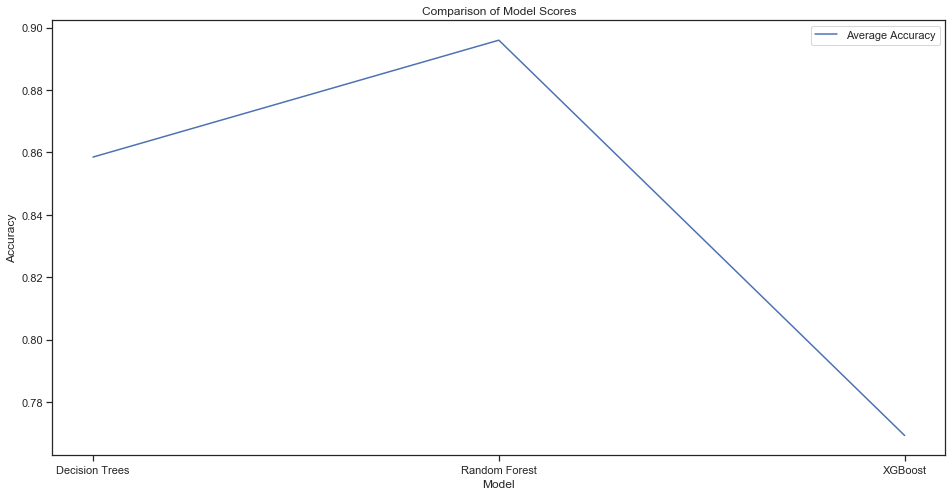

In [27]:
plt.figure(figsize=(16, 8))
ax = (models.Accuracy).plot(kind='line',label = 'Average Accuracy')
ax.set_title('Comparison of Model Scores')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_xticks([0,1,2])
ax.set_xticklabels(np.array(models.Names))
ax.legend()

The table and graph above shows Random Forest gave us the best mean accuracy over 10-fold validation samples at 0.89, followed by decision trees aat 0.85 and XGBoost ad 0.76.

We may choose Random Forest to test the importance of features and prediction of the outcomes.

Function below compares scores of each model and chooses the best model automatially.

In [28]:
if ((np.mean(dtr_scores) > np.mean(forest_scores)) and (np.mean(dtr_scores) > np.mean(boost_scores))):
    model =  dtr
    new = DecisionTreeClassifier(random_state = random)
    name = "Decision Tree"
elif ((np.mean(forest_scores) > np.mean(dtr_scores)) and (np.mean(forest_scores) > np.mean(boost_scores))):
    model =  forest
    new = RandomForestClassifier(random_state = random)
    name = "Random Forest"
elif ((np.mean(boost_scores) > np.mean(dtr_scores)) and (np.mean(boost_scores) > np.mean(forest_scores))):
    model = boost
    new = XGBClassifier(learning_rate = (grid.best_params_)["learning_rate"],n_estimators = (grid.best_params_)["n_estimators"],random_state = random)
    name = "XGBoost"

# 3.F Feature importance test with finalized model

[Text(0, 0, 'age'),
 Text(0, 0, 'job'),
 Text(0, 0, 'balance'),
 Text(0, 0, 'prev_contact_day_of_week'),
 Text(0, 0, 'prev_contact_month_of_year'),
 Text(0, 0, 'prev_contact_duration'),
 Text(0, 0, 'prev_camp_outcome'),
 Text(0, 0, 'num_contacts'),
 Text(0, 0, 'education'),
 Text(0, 0, 'prev_communication_type'),
 Text(0, 0, 'marital'),
 Text(0, 0, 'housing'),
 Text(0, 0, 'previously_contacted'),
 Text(0, 0, 'loan'),
 Text(0, 0, 'default')]

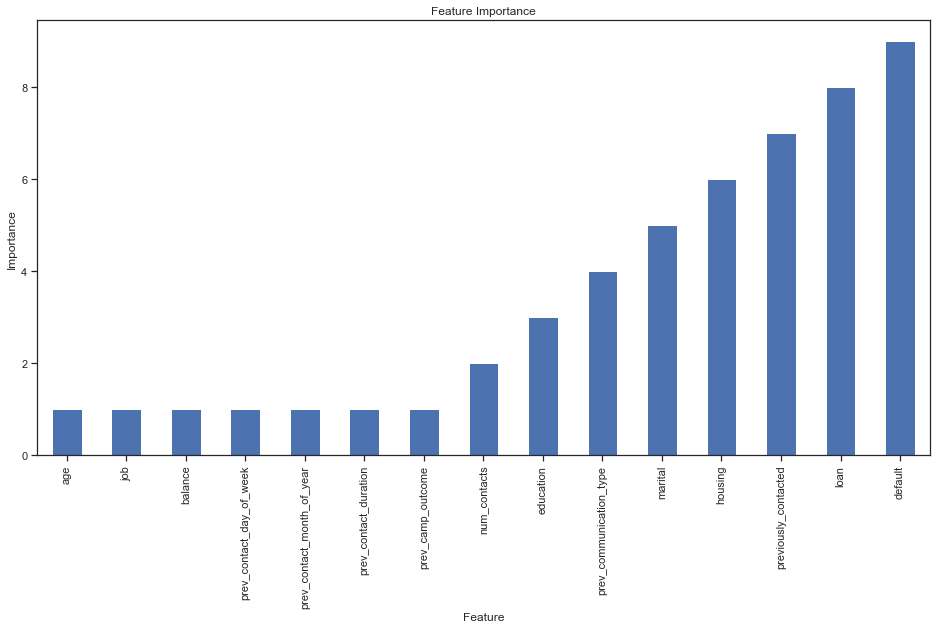

In [29]:
rfe = RFE(estimator = model,step = 1)
rfe = rfe.fit(X_train,y_train)
feat_imp = pd.DataFrame()
feat_imp['scores'] = rfe.ranking_
feat_imp['names'] = X.columns
feat_imp.sort_values(by='scores',ascending=True,inplace=True)
feat_imp.reset_index(inplace=True)
feat_imp.drop('index',1,inplace=True)

plt.figure(figsize=(16, 8))
ax = (pd.Series(feat_imp.scores)).plot(kind='bar')
ax.set_title('Feature Importance')
ax.set_xlabel('Feature')
ax.set_ylabel('Importance')
ax.set_xticklabels(feat_imp.names)

The feature importance plot shows us the ranks given to each feature based on its importance.

The lower the rank, the more important the feature.

Here, 7 features have greatest and equal importance, while no other pair shows equal importance from the rest of the features.

However, this is not an indicator of which features should or should not be selected in our predictive model.

To solve this, we must run the model multiple times considering all ranks as thresholds in terms of choosing features and calculating its accuracy score.

We will then choose the combination of features that gives us the greatest accuracy score to predict our outcomes in the test data.

# 3.G Target prediction with feature selection

In [45]:
train = pd.DataFrame()
final_accuracy = 0.00

for rank in feat_imp.scores.unique():
    train = pd.DataFrame()
    for each in feat_imp.loc[feat_imp.scores <= rank]['names']:
        train[each] = X_train[each]

    new.fit(train,y_train)
    new_scores = cross_val_score(new, train, y_train, cv=k)

    if (np.mean(new_scores) > final_accuracy):
        final_accuracy = np.mean(new_scores)
        features_rank = rank

In [46]:
train = pd.DataFrame()
test = pd.DataFrame()

for each in feat_imp.loc[feat_imp.scores <= features_rank]['names']:
    train[each] = X_train[each]
    test[each] = X_test[each]

new.fit(train,y_train)
final_accuracy = new.score(test,y_test)

In [47]:
print("Accuracy:",final_accuracy)  
print("AUC:",AUC)
print()
print("Features in the final model:",*np.array(feat_imp.loc[feat_imp.scores <= features_rank]['names']),sep='\n')

Accuracy: 0.9002994254268836
AUC: 0.9210439355718936

Features in the final model:
age
job
balance
prev_contact_day_of_week
prev_contact_month_of_year
prev_contact_duration
prev_camp_outcome
num_contacts
education
prev_communication_type
marital
housing
previously_contacted
loan


On running our predictive mode, we get an improvement in the accuracy score of 0.90 from 0.89. 

This difference might be small, but when a company's expenses are dependent on it, each percentage matters.

The model also displays the final list of features it chose in carrying out the predictions.

The model evaluated a threshold of <= 6 as the ideal in terms of obtaining the greatest accuracy score.

# 3.H Model performance evaluation by visualizing the ROC Curve

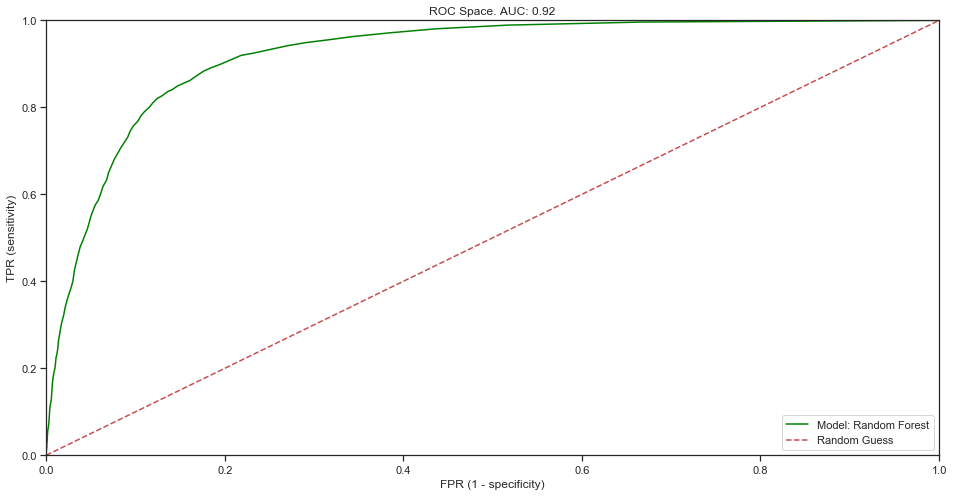

In [52]:
new.fit(final_train,y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,pd.DataFrame(new.predict_proba(final_test))[1])
plt.figure(figsize=(16, 8))
plt.title('ROC Space. AUC: '+str(round(AUC,2)))
plt.xlabel('FPR (1 - specificity)')
plt.ylabel('TPR (sensitivity)')
plt.plot(fpr,tpr,c="green", label = "Model: "+name)
plt.plot((0,1), 'r--', label='Random Guess')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.margins(0)
plt.legend(loc = 4)

# Conclusion

This was a substantial dataset with enough number of features relevent to our problem. The target variable is binary and it helps having a majority of features as categorical making the classification problem easier and more durable. Moreover, the dataset has no missing values, letting us use the entire range of over 40,000 rows of information on individual clients.

The features were fairly direct but were made more explanatory and better fitting to the model with the help of Feature Engineering. The model without Feature Engineering would give us a prediction with a little over 80% accuracy.

With Data Visualization, we learnt that it will be more beneficial for the bank to reach out to previously contacted clients which have shown to have subscribed a lot more to term deposits as against their current aproach of reaching out to an 80% of new clients.

Another astute observation would be that the bank is focusing their attention to clients between the age of 20-60 which have the highest frequency of records as per the distribution plot, when clients under the age of 20 and over the age of 60 have shown a considerably bette response in terms of subscribing to term deposits.

The banks have also reached out to clients with a low bank balance (<20,000), but the clients with a greater bank balance have shown a better response in terms of subscription.

The feature importance test tells us that although previously contacted clients might observe a better response in terms of subscription in the past, that feature is not very relevant to our problem and has been given a very low rank in the final model.

The feature previous contact day of week is observed to be distributed equally amongst all options which could lead us to believing that it is not important to our prediction mode, but the feature importance test tells us that it is one of the most important features that exists in our dataset. That is because it shows greater importance when combined with other features.

Sampling with a 10 fold cross validation for models gives a better understanding of their durability with varying train and test records and, in this example, Random Forest looks like having won the race in terms of providing the highest accuracy of 90%. This means from our sample, the outcome of contacting 90% of the clients has been predicted correctly. Putting it in real-ife terms, if we contact only clients who are expected to sign up to term deposits, only 1 call out of 10 would yield in a failure. But every failed call gives us a better information on training the future model better.

Sensitivity can be considered the most important metric in our example, more than specificity. Sensitivity tells us the probability of capturing the positive outcomes whereas specificity tell us a probability of excluding a failed outcome. Since a failed call is worth a lot less than a missed subscribing-client, we can confirm to use a model with high sensitivity. The Random Forest used in this case complements that problem with a high sensitivity score of over 90%.